In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N1 = 100
r = np.random.uniform(0,1,N1)
theta = np.random.uniform(0,1,N1)*2*np.pi
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
dataX1 = r*[np.cos(theta), np.sin(theta)]
dataX1 = np.transpose(dataX1)
dataY1 = np.ones((N1))
N2 = 200
r = np.random.uniform(2,3,N2)
theta = np.random.uniform(0,1,N2)*2*np.pi
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
dataX2 = r*[np.cos(theta), np.sin(theta)]
dataX2 = np.transpose(dataX2)
dataY2 = np.zeros((N2))

In [3]:
dataX = np.concatenate((dataX1,dataX2),axis = 0)
print(dataX.shape)
dataY = np.concatenate((dataY1,dataY2),axis = 0)
dataY = dataY.reshape(300,1)
print(dataY.shape)

(300, 2)
(300, 1)


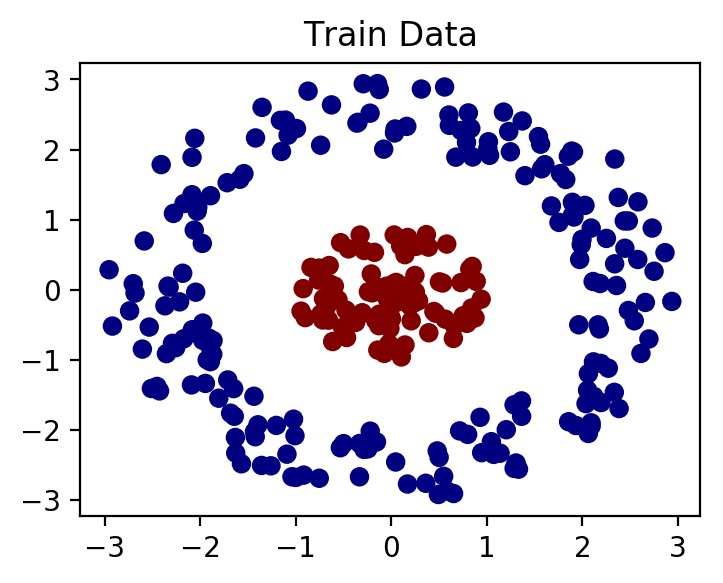

In [4]:
fig = plt.figure(figsize=(4, 3), dpi=200)
plt.scatter(dataX[:, 0], dataX[:, 1], c=dataY[:, 0], cmap= 'jet')
plt.title('Train Data')
#plt.savefig("./images/train_data.png")
plt.show()


## Plain Tensorflow with $n = 5$

In [5]:
tf.reset_default_graph()

In [6]:
n_inputs = 2
n_hidden = 2
n_outputs = 1

In [7]:
X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = "X")
y = tf.placeholder(tf.float32, shape = (None,1), name = "y")

In [8]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
       # stddev = 2 / np.sqrt(n_inputs)
       # init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(tf.random_normal([n_inputs,n_neurons]), name="kernel")
        b = tf.Variable(tf.random_normal([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [9]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden, name="hidden1",
                           activation=tf.nn.tanh)
    hidden2 = neuron_layer(hidden1, n_hidden, name="hidden2",
                           activation=tf.nn.tanh)
    hidden3 = neuron_layer(hidden2, n_hidden, name="hidden3",
                           activation=tf.nn.tanh)
    hidden4 = neuron_layer(hidden3, n_hidden, name="hidden4",
                           activation=tf.nn.tanh)
 #   hidden5 = neuron_layer(hidden4, n_hidden, name="hidden5",
 #                          activation=tf.nn.tanh)
    logits = neuron_layer(hidden4, n_outputs, name="outputs")

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [11]:
with tf.name_scope("eval"):
    predicted = tf.round(logits)
   # correct_pred = tf.equal(tf.cast(predicted,tf.int32), tf.cast(y, tf.int32))
    correct_pred = tf.equal(predicted, y)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [12]:
learning_rate = 0.001

with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [13]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [14]:
n_epochs = 4000

with tf.Session() as sess:
    init.run()
    loss_history, accuracy_history = [], []
    for epoch in range(n_epochs):
        sess.run(training_op, feed_dict = {X: dataX, y: dataY})
        
        l = sess.run(loss, feed_dict = {X: dataX, y: dataY})
        accu = sess.run(accuracy, feed_dict = {X: dataX, y:dataY})
        
        loss_history.append(l)
        accuracy_history.append(accu)
        
        # Display result on curren Epoch
      #  if epoch %100 == 0 and epoch != 0:
       #     print("Epoch " + str(epoch) + "Loss: "+ str(l) + "\n")
        #    print("Epoch " + str(epoch) + "Accuracy: " + str(accu)+ "\n")
            
    save_path = saver.save(sess, "./FC_4_new.ckpt")

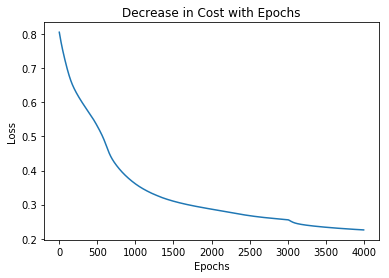

In [15]:
plt.plot(list(range(n_epochs)), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Decrease in Cost with Epochs')
plt.savefig("./images/FC_4_Cost.png")
plt.show()


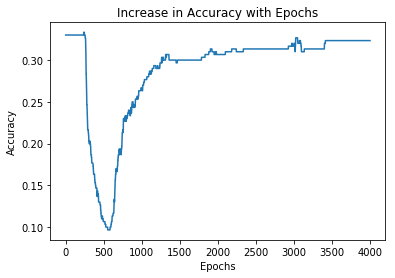

In [16]:
plt.plot(list(range(n_epochs)), accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Increase in Accuracy with Epochs')
plt.savefig("./images/FC_4_Accu.png")
plt.show()

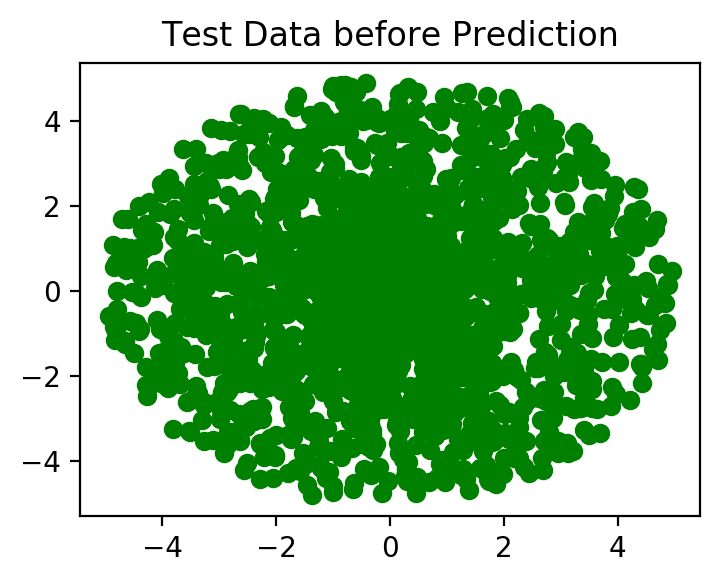

In [17]:
# Randomly generate 2000 points in the ball B(0,5)
N = 2000
r = np.random.uniform(0,5,N)
theta = np.random.uniform(0,5,N)*2*np.pi
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
dataXv = r*[np.cos(theta), np.sin(theta)]
dataXv = np.transpose(dataXv)

fig = plt.figure(figsize=(4, 3), dpi=200)
plt.scatter(dataXv[:, 0], dataXv[:, 1], c='green')
plt.title('Test Data before Prediction')
#plt.savefig("./images/test_data.png")
plt.show()


In [18]:
with tf.Session() as sess:
    saver.restore(sess, "./FC_4_new.ckpt")
    logits_yv = logits.eval(feed_dict = {X: dataXv})
    yv_pred = predicted.eval(feed_dict = {X: dataXv})

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./FC_4_new.ckpt


In [19]:
dataXv1 = dataXv[logits_yv[:,0] >= 0.5]
print(dataXv1.shape)

(679, 2)


In [20]:
dataXv2= dataXv[logits_yv[:,0] < 0.5]
print(dataXv2.shape)

(1321, 2)


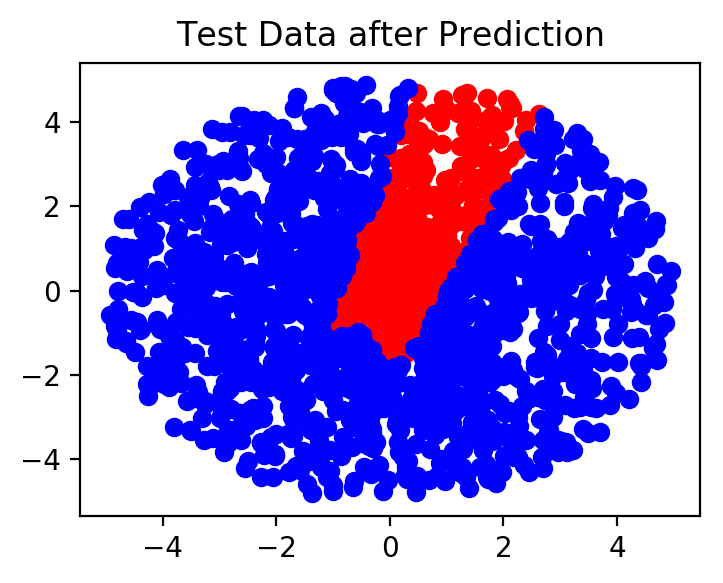

In [21]:
fig = plt.figure(figsize=(4, 3), dpi=200)
plt.scatter(dataXv1[:,0], dataXv1[:,1], c = 'red')
plt.scatter(dataXv2[:,0], dataXv2[:,1], c = 'blue')
plt.title('Test Data after Prediction')
plt.savefig("./images/FC_4.png")
plt.show()

In [22]:
logits_yv

array([[-7.117799 ],
       [-7.1548944],
       [-7.1549287],
       ...,
       [-4.524022 ],
       [-7.1893477],
       [-4.5237193]], dtype=float32)